In [ ]:
!pip install bnlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se Instaló la Libreria

In [ ]:
 !pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random as r
import pylab
import matplotlib.pyplot as plt
import numpy as np
import bnlearn as bn
import pandas as pd

In [ ]:
ls

dataset18.csv  sample_data/


importamos libreria de bnlearn


In [ ]:
df = pd.read_csv('dataset18.csv',index_col =False)

# Nueva sección

Se crea matriz con los datos otorgados en el CSV

In [ ]:
df.head()

,inflacion,guerra_ucrania,precios_altos,escasez,no_carne,no_confort,no_alcohol
0,1,1,1,0,0,0,0
1,1,0,1,1,1,0,1
2,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1
4,0,1,1,1,1,1,0


# Nueva sección

In [ ]:
model = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


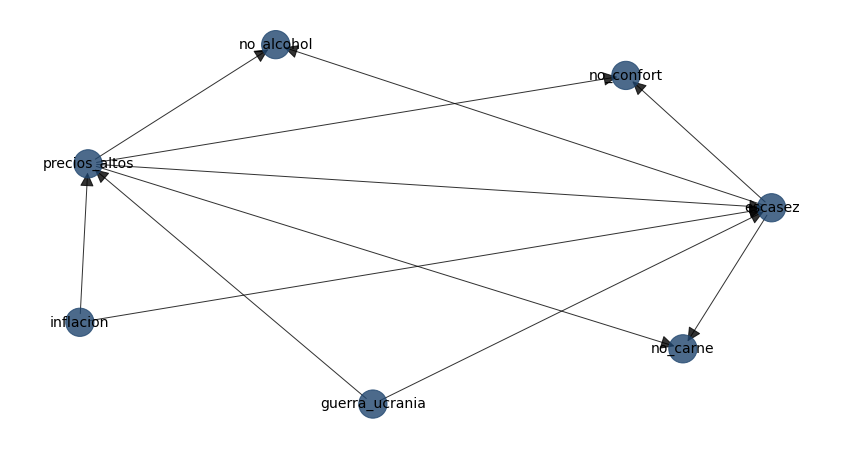

In [ ]:
g = bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of inflacion:
+--------------+----------+
| inflacion(0) | 0.200327 |
+--------------+----------+
| inflacion(1) | 0.799673 |
+--------------+----------+
[bnlearn] >CPD of precios_altos:
+------------------+-----+---------------------+
| guerra_ucrania   | ... | guerra_ucrania(1)   |
+------------------+-----+---------------------+
| inflacion        | ... | inflacion(1)        |
+------------------+-----+---------------------+
| precios_altos(0) | ... | 0.09951699272087622 |
+------------------+-----+---------------------+
| precios_altos(1) | ... | 0.9004830072791238  |
+------------------+-----+---------------------+
[bnlearn] >CPD of escasez:
+----------------+-----+---------------------+
| guerra_ucrania | ... | guerra_ucrania(1)   |
+----------------+-----+---------------------+
| inflacion      | ... | inflacion(1)        |
+----------------+-----+

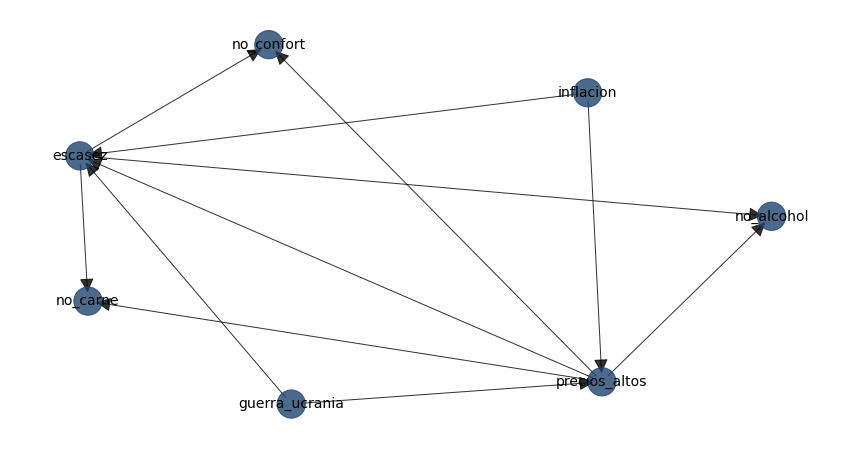

In [ ]:
#actualizamos el modelo 
model_a = bn.parameter_learning.fit(model,df)
g2 = bn.plot(model_a)


**Inferencias** \\
Pedido:Enuncie y efectúe tres consultas de inferencia sobre la red construida. 
Deberá documentar cómo se reorganizan los parámetros para cada uno de 
los casos. (15 ptos – 5 ptos c/u) 

1)Probabilidad que no haya confort debido a que hay guerra en ucrania y escasez
 

Cuanto son las probabilidades de que no haya confort, sabiendo y teniendo como evidencia que este la guerra de ucrania y se esté produciendo escasez.

En donde se pueve ver en el modelo, que el hecho que haya escasez produce que no exista confort 

In [ ]:
i1 = bn.inference.fit(model_a,variables=['no_confort'], evidence={'guerra_ucrania':1,'escasez':1},verbose=0)
print(i1)

+---------------+-------------------+
| no_confort    |   phi(no_confort) |
+===============+===================+
| no_confort(0) |            0.1900 |
+---------------+-------------------+
| no_confort(1) |            0.8100 |
+---------------+-------------------+


2)Probabilidad que exista escasez debido a que está la guerra de ucrania.

En esta, tenemos la escasez como foco principal y la probilidad de que esta sea causada debido a que existe la guerra en ucrania.

In [ ]:
i2 = bn.inference.fit(model_a,variables=['escasez'], evidence={'guerra_ucrania':1},verbose=0)
print(i2)

+------------+----------------+
| escasez    |   phi(escasez) |
+============+================+
| escasez(0) |         0.3006 |
+------------+----------------+
| escasez(1) |         0.6994 |
+------------+----------------+


3)Probabilidad de que haya guerra en ucrania debido a que no hay carne. 

Aqui, analizamos como o cual es la probabilidad de que la guerra de ucrania sea causada debido a la falta de carne o como afecta esta situacion al punto de referencia.

In [ ]:
i3 = bn.inference.fit(model_a,variables=['guerra_ucrania'], evidence={'no_carne':0},verbose=0)
print(i3)

+-------------------+-----------------------+
| guerra_ucrania    |   phi(guerra_ucrania) |
+===================+=======================+
| guerra_ucrania(0) |                0.1483 |
+-------------------+-----------------------+
| guerra_ucrania(1) |                0.8517 |
+-------------------+-----------------------+


**PREGUNTA 2** \\
Día a día, uno de los profesores de Inteligencia Artificial (que no se nombrará para 
ocultar su identidad), escucha distintas canciones de una diversidad de grupos a 
través del servicio de streaming Spotify. Dada su naturaleza metalera, el profesor 
escucha los siguientes grupos: Helloween (G1) , Hammerfall (G2), Stratovarius 
(G3), Rhapsody of fire (G4), Yngwie Malmsteen (G5), Liquid Tension Experiment 
(G6),  Blind Guardian (G7), Sonata Arctica (G8) y Symphony X (G9)1. Un día 
cualquiera, el profesor nota que el orden de las canciones que va escuchando siguen 
una cierta distribución de probabilidades: 

In [ ]:
n = 10000000
x = 9
y = x
start = 5
groups = ['Halloween','Hammerfall','Stratovarius',
          'Rhapsody of fire','Yngwie Malmsteen','Liquid Tension Experiment',
          'Blind Guardian','Sonata Arctica','Symphony X']



matrix = np.array([[0.25 , 0.06 , 0.08 , 0.15 , 0.04 , 0.02 , 0.15 , 0.15 , 0.10 ],
                  [0.15 , 0.15 , 0.10 , 0.22 , 0.01 , 0.02 , 0.15 , 0.10 , 0.10 ],
                  [0.12 , 0.00 , 0.05 , 0.24 , 0.14 , 0.04 , 0.27 , 0.07 , 0.07 ], 
                  [0.05 , 0.13 , 0.05 , 0.30 , 0.10 , 0.10 , 0.22 , 0.05 , 0.00 ],
                  [0.18 , 0.20 , 0.07 , 0.20 , 0.15 , 0.05 , 0.05 , 0.05 , 0.05 ], 
                  [0.20 , 0.10 , 0.20 , 0.05 , 0.05 , 0.10 , 0.02 , 0.15 , 0.13 ], 
                  [0.01 , 0.05 , 0.15 , 0.14 , 0.17 , 0.10 , 0.12 , 0.10 , 0.16 ], 
                  [0.17 , 0.15 , 0.07 , 0.07 , 0.15 , 0.10 , 0.12 , 0.09 , 0.08 ], 
                  [0.13 , 0.11 , 0.13 , 0.03 , 0.20 , 0.20 , 0.04 , 0.15 , 0.01 ]])

print(np.sum(matrix,axis= 1))



[1. 1. 1. 1. 1. 1. 1. 1. 1.]


Al recibir el arreglo de puros 1, significa que cumple con la condicion de las probabilidades, dejando demostrado que estamos trabajando con una matriz de Markov.


In [ ]:
prob = list()
song = [0,1,2,3,4,5,6,7,8] # Listado de canciones [Referencial]
#posicion inicial [Cancion]
songact = r.randint(0,8)
rep = [0,0,0,0,0,0,0,0,0]
print("Cancion inicial: ", songact)

for i in range(0,n):
  #print(songact)
  rep[songact]=rep[songact]+1
  #prob de siguientes cancion por cancion inicial
  prob = list()
  for j in range(0,9):
    prob.append(matrix[songact][j]) # con esto guardo todas las probabilidades de las siguientes canciones
  #vemos la siguiente cancion
  #print(prob)
  next = np.random.choice(song,None,False,prob) # genero un numero aleatorio segun las probabilidades dentro de la mtriz de markov
  songact = next

for i in range(0,9):
  song[i] = song[i]+ 1
  print('Cancion n°', song[i], ' se repitió:', rep[i], "Probabilidad:",rep[i]/n)



Cancion inicial:  6
Cancion n° 1  se repitió: 1318532 Probabilidad: 0.1318532
Cancion n° 2  se repitió: 1054401 Probabilidad: 0.1054401
Cancion n° 3  se repitió: 947906 Probabilidad: 0.0947906
Cancion n° 4  se repitió: 1710067 Probabilidad: 0.1710067
Cancion n° 5  se repitió: 1100245 Probabilidad: 0.1100245
Cancion n° 6  se repitió: 773954 Probabilidad: 0.0773954
Cancion n° 7  se repitió: 1368333 Probabilidad: 0.1368333
Cancion n° 8  se repitió: 963182 Probabilidad: 0.0963182
Cancion n° 9  se repitió: 763380 Probabilidad: 0.076338


El computo anterior, fueron las probabilidades por cancion que se obtuvo luego detrabajar con el RandomWalk analizando la probabilidad de la cancion siguiente estando en una ya establecida. \\
Esta probabilidad deberia  de ir siendo mas exacta segun fuese aumentando la cantidad de datos tomados, por ejemplo, si como 10 datos las probabilidades por cancion no deberia ser lo mas exacto y no debiese parecerse a la probabilidad estacionaria. \\
Para poder hacer valido esto decidí realizar la toma de canciones con 10 millones de cambios, de esta manera, podre obtener un valor más cercano a los resultados reales. 

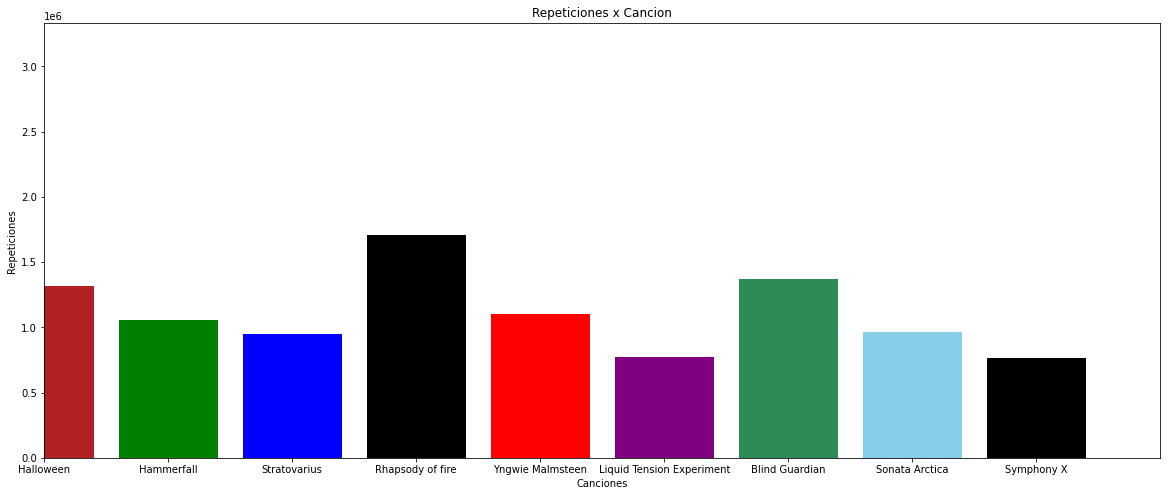

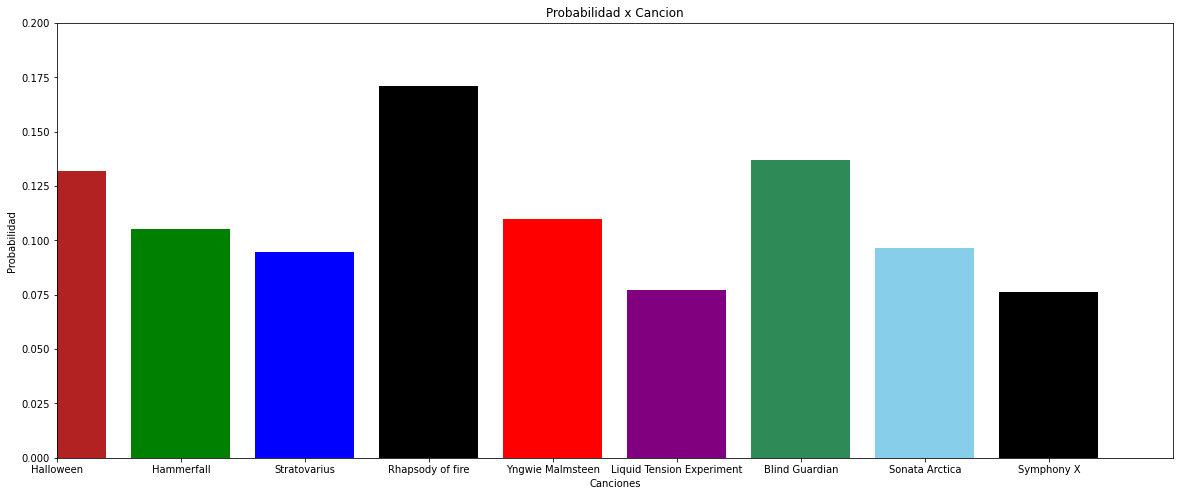

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(groups,rep, color = ['firebrick', 'green', 'blue', 'black', 'red','purple', 'seagreen', 'skyblue', 'black'],align='center')
plt.xlabel('Canciones')
plt.ylabel("Repeticiones")
plt.xlim(0,9)
plt.ylim(0,n/3)
plt.title('Repeticiones x Cancion')
plt.show()

probs = list()
for i in range(0,9):
  probs.append(rep[i]/n)

plt.figure(figsize=(20,8))
plt.bar(groups,probs, color = ['firebrick', 'green', 'blue', 'black', 'red','purple', 'seagreen', 'skyblue', 'black'],align='center')
plt.xlabel('Canciones')
plt.ylabel("Probabilidad")
plt.xlim(0,9)
plt.ylim(0,0.2)
plt.title('Probabilidad x Cancion')
plt.show()

In [ ]:
import scipy.linalg

In [ ]:
valores,izq = scipy.linalg.eig(matrix, right = False, left = True)
pi = izq[:,0]
count = 1
for val in pi:
  pi_norm = (val/np.sum(pi)).real
  print('Probabilidad del G', count,'(',groups[count-1],'): ', pi_norm)
  count = count + 1

Probabilidad del G 1 ( Halloween ):  0.13162584672321817
Probabilidad del G 2 ( Hammerfall ):  0.10540775933852617
Probabilidad del G 3 ( Stratovarius ):  0.09476106457333996
Probabilidad del G 4 ( Rhapsody of fire ):  0.1710904937439276
Probabilidad del G 5 ( Yngwie Malmsteen ):  0.11006619229911921
Probabilidad del G 6 ( Liquid Tension Experiment ):  0.07747712305709732
Probabilidad del G 7 ( Blind Guardian ):  0.13687884345048337
Probabilidad del G 8 ( Sonata Arctica ):  0.09640482650035631
Probabilidad del G 9 ( Symphony X ):  0.07628785031393201


Los resultados obtenidos dentro de esta probabilidad estacionaria, se pueden comparar y confirmar con los resultados obtenidos con el punto anterior, en donde las diferencias de valores en las probabilidades son minimas, al punto en que cambian recien en el cuarto decimal. Dejando demostrado que la forma en la que se ejecutó la tarea fue la correcta. 